In [1]:
from cereeberus.data import graphs
from cereeberus.reeb.graph import Reeb

# Examples of Reeb graphs

In the following notebook, we show examples of Reeb graphs that are included in the package which show functionality related to the main class. All Reeb graphs are stored as the class `cereberus.reeb.Reeb`.

In [2]:
reeb_torus = graphs.reeb_torus()
reeb_torus

The Reeb Graph class has many attributes available such as nodes, edges, position, up degree, down degree, and function values provided at class instantiation

In [3]:
print("Reeb Graph nodes: ", reeb_torus.nodes)
print("Reeb Graph edges: ", reeb_torus.edges)
print("Reeb Graph function values: ", reeb_torus.fx)
print("Reeb Graph up degree: ", reeb_torus.up_deg)
print("Reeb Graph down degree: ", reeb_torus.down_deg)
#print("Reeb Graph Adjacency Matrix:", reeb_torus.adjacency)
print("Reeb Graph Plotting Positions:", reeb_torus.pos_fx)
print("Drawing Preference:", reeb_torus._horizontalDrawing)
reeb_torus.summary

Reeb Graph nodes:  [0, 1, 2, 3, 4, 5]
Reeb Graph edges:  [(0, 1, 0), (1, 2, 0), (1, 3, 0), (2, 4, 0), (3, 4, 0), (4, 5, 0)]
Reeb Graph function values:  {0: 1, 1: 2, 2: 3, 3: 3, 4: 4, 5: 5}
Reeb Graph up degree:  {0: 1, 1: 2, 2: 1, 3: 1, 4: 1, 5: 0}
Reeb Graph down degree:  {0: 0, 1: 1, 2: 1, 3: 1, 4: 2, 5: 1}
Reeb Graph Plotting Positions: {0: (1, 1), 1: (1, 2), 2: (0.5, 3), 3: (1.5, 3), 4: (1, 4), 5: (1, 5)}
Drawing Preference: False


{'nodes': 6, 'edges': 6}

There is also a custom plot function to plot Reeb Graphs which can be called with `plot_reeb`.

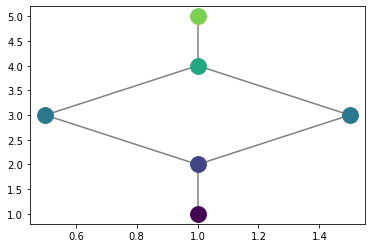

In [4]:
reeb_torus.plot_reeb()

By using the `horizontalDrawing` parameter, you can plot the Reeb Graph horizontally instead of vertically

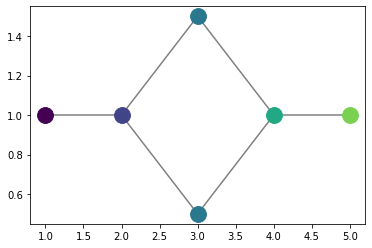

In [5]:
reeb_torus.plot_reeb(horizontalDrawing=True)

You can also pass your own positions in, in which case we note the `horizontalDrawing` and `verbose` parameters are not used.

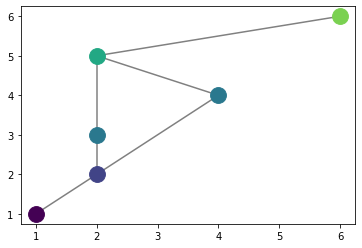

In [6]:
reeb_torus.plot_reeb(position = {0:(1,1), 1:(2,2), 2:(2,3), 3:(4,4), 4:(2,5), 5:(6,6)}, horizontalDrawing = False, verbose = False)

You can also reset the positions completely by using the `resetSpring` parameter

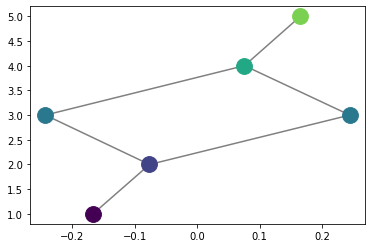

In [7]:
reeb_torus.plot_reeb(resetSpring = True)

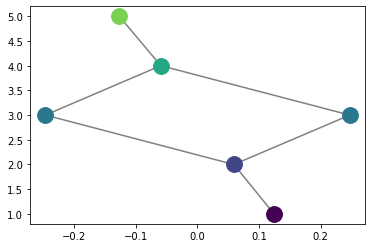

In [8]:
reeb_torus.plot_reeb(resetSpring = True)

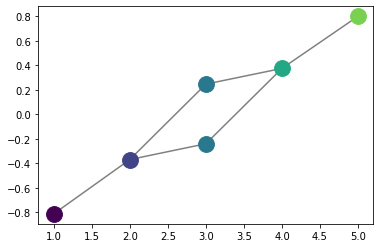

In [9]:
reeb_torus.plot_reeb(resetSpring = True, horizontalDrawing=True)

There are also some other graphs, such as the dancing man

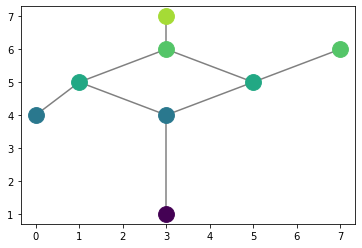

In [10]:
dm = graphs.reeb_dancing_man()
dm.plot_reeb()

The next is an illustration of how loops are handled in the `plot_reeb()` function.  The 'cp' parameter controls how loopy the loops are.

In [11]:
sl = graphs.reeb_simple_loops()

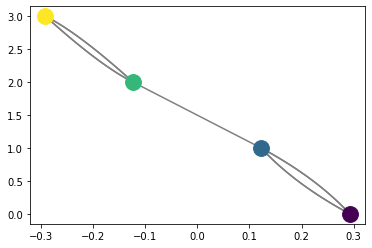

In [12]:
sl.plot_reeb(cpx=.1)

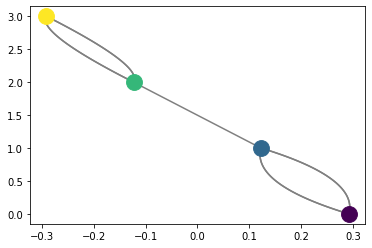

In [13]:
sl.plot_reeb(cpx=.5)

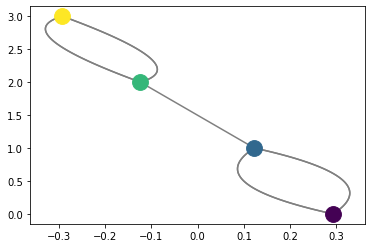

In [14]:
sl.plot_reeb(cpx=1)

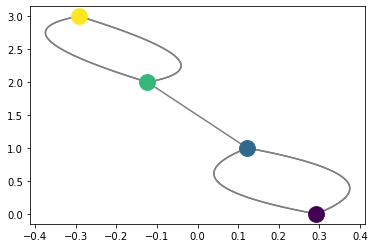

In [15]:
sl.plot_reeb(cpx=1.5)

We can add nodes at a certain function values.  To demonstrate this we will use the `reeb_torus` graph.

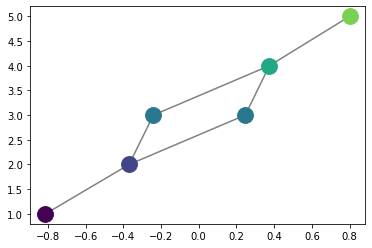

In [16]:
reeb_torus.plot_reeb()

Let's add a node at value 4.5

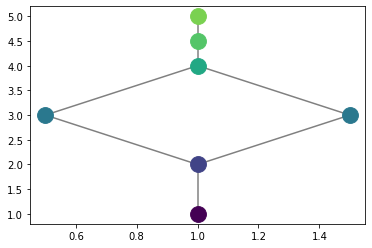

In [17]:
import cereeberus.compute.degree as degree
import networkx as nx
reeb_torus = graphs.reeb_torus()
reeb_torus_add = degree.add_nodes(reeb_torus, fx=4.5, x = 1)
reeb_torus_add.plot_reeb()

Let's add additional nodes at 3.5

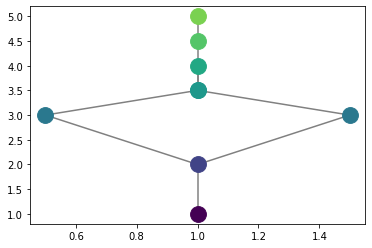

In [18]:
reeb_torus_add = degree.add_nodes(reeb_torus_add, fx=3.5, x=1)
reeb_torus_add.plot_reeb()

And one more at 1.25

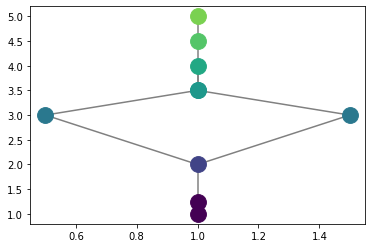

In [19]:
reeb_torus_add = degree.add_nodes(reeb_torus_add, fx=1.25, x=1)
reeb_torus_add.plot_reeb()

We can also remove any unnecessary nodes using the `minimal_reeb` function

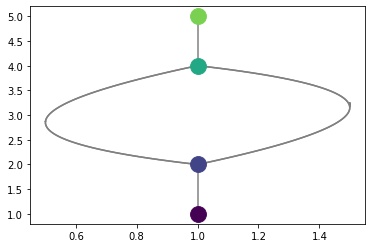

In [20]:
reeb_torus_min = degree.minimal_reeb(reeb_torus_add)
reeb_torus_min .plot_reeb(cpx=1)

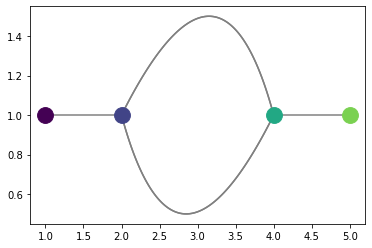

In [21]:
reeb_torus_min.plot_reeb(horizontalDrawing = True, cpy=1)

You can also create random merge trees and plot them

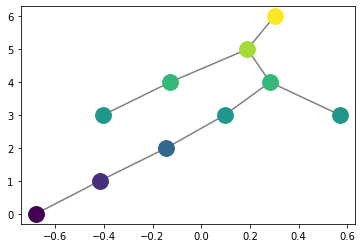

In [22]:
from cereeberus.data.randomMergeTrees import randomMerge
from cereeberus.compute.merge import Merge
R = randomMerge(10)
M = Merge(R.G, R.fx)
M.plot_reeb()

#### You can also check if a graph is a merge tree.

This works for both Reeb graphs and Networkx graphs, and it part of the Merge function already

In [23]:
from cereeberus.compute.merge import isMerge
### Reeb Graph
isMerge(R,R.fx)


True

In [24]:
### Networkx Graph
isMerge(R.G,R.fx)

True

In [25]:
### Error when object is not either
Merge(R.fx,R.fx)

TypeError: Graph is not a networkx graph or Reeb graph

#### To compute a merge tree from a Reeb Graph, we need to first identify any isolates in the graph (nodes with degree 0) and remove them as they will not be going into the merge tree.  Looking at a Reeb graph with isolates:

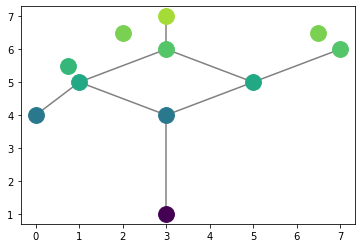

In [26]:
jm = graphs.reeb_juggling_man()
jm.plot_reeb()

#### Then we can remove isolates and plot

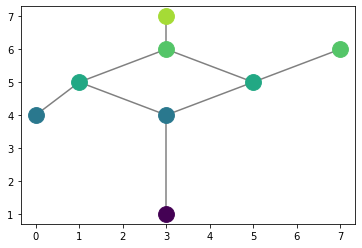

In [28]:
jm_im = degree.remove_isolates(jm)
jm_im.plot_reeb()